In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./vehicles.csv')
data.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7307730503,https://auburn.craigslist.org/cto/d/opelika-ha...,auburn,https://auburn.craigslist.org,9500,2003.0,chrysler,town & country,excellent,6 cylinders,...,fwd,mid-size,mini-van,blue,https://images.craigslist.org/00w0w_41YO8cHlW3...,2003 Chrysler Town and Country Handicapped Acc...,NaN,al,32.614209,-85.326357
1,7307218858,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,28990,2018.0,gmc,acadia sle-2 sport utility,good,6 cylinders,...,fwd,NaN,other,white,https://images.craigslist.org/00c0c_kXhBir3Ii6...,Carvana is the safer way to buy a car During t...,NaN,al,32.590000,-85.480000
2,7307164168,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,16590,2013.0,lincoln,mkz sedan 4d,good,NaN,...,fwd,NaN,sedan,red,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,al,32.590000,-85.480000
3,7307164193,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,28990,2017.0,gmc,acadia slt-1 sport utility,good,6 cylinders,...,fwd,NaN,other,NaN,https://images.craigslist.org/00w0w_b3G8mxfApI...,Carvana is the safer way to buy a car During t...,NaN,al,32.590000,-85.480000
4,7307142186,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,20590,2017.0,lincoln,mkz premiere sedan 4d,good,NaN,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00F0F_ghX7UUlnBr...,Carvana is the safer way to buy a car During t...,NaN,al,32.590000,-85.480000


In [3]:
data.shape

(441396, 25)

# Visualization

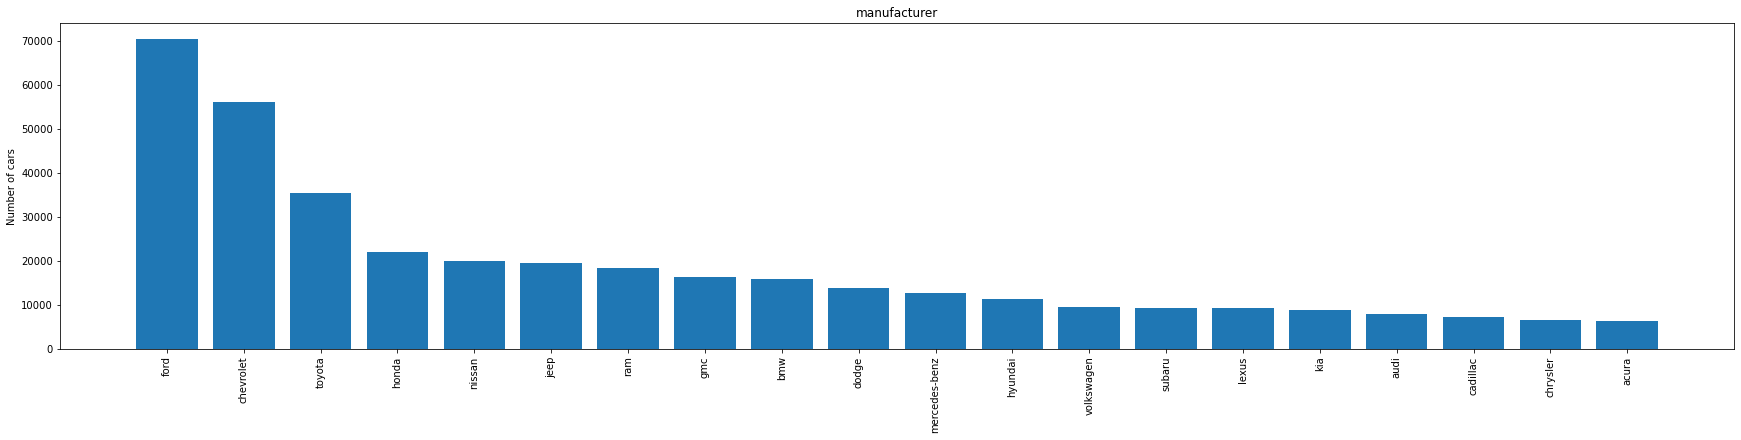

In [12]:
cars_manufacturers = data.groupby('manufacturer').id.count().sort_values(ascending=False).head(20)
plt.figure(figsize=(30, 6))
plt.bar(cars_manufacturers.index, cars_manufacturers.values);
plt.xticks( rotation='vertical');
plt.ylabel('Number of cars');
plt.title('manufacturer');

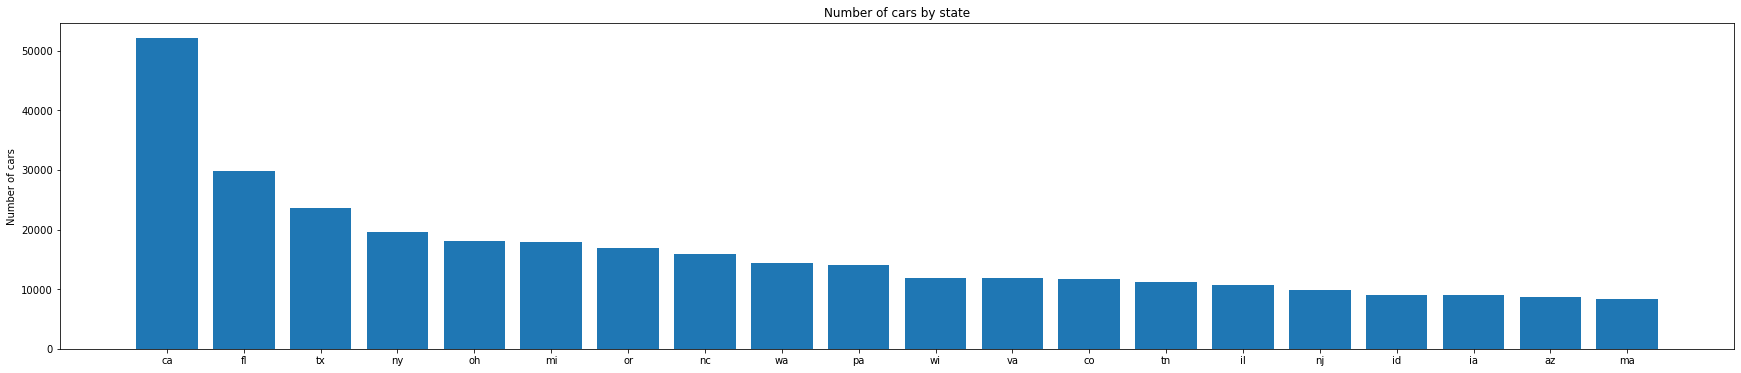

In [8]:
# Car Distribution per state 
cars_state = data.groupby('state').id.count().sort_values(ascending=False).head(20)
plt.figure(figsize=(30, 6))
plt.bar(cars_state.index, cars_state.values);
plt.ylabel('Number of cars');
plt.title('Number of cars by state');

<AxesSubplot:xlabel='paint_color', ylabel='price'>

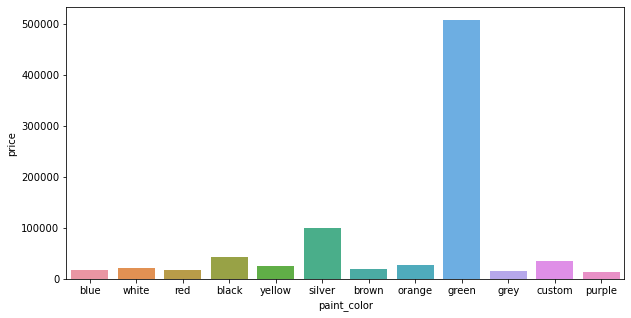

In [9]:
plt.figure(figsize=(10,5))
sns.barplot(x="paint_color", y="price", data=data, ci=None)

<AxesSubplot:xlabel='size', ylabel='price'>

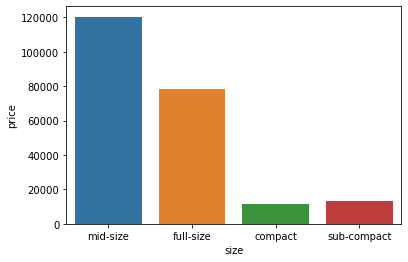

In [10]:
# Size vs Price
sns.barplot(x="size", y="price", data=data, ci=None)

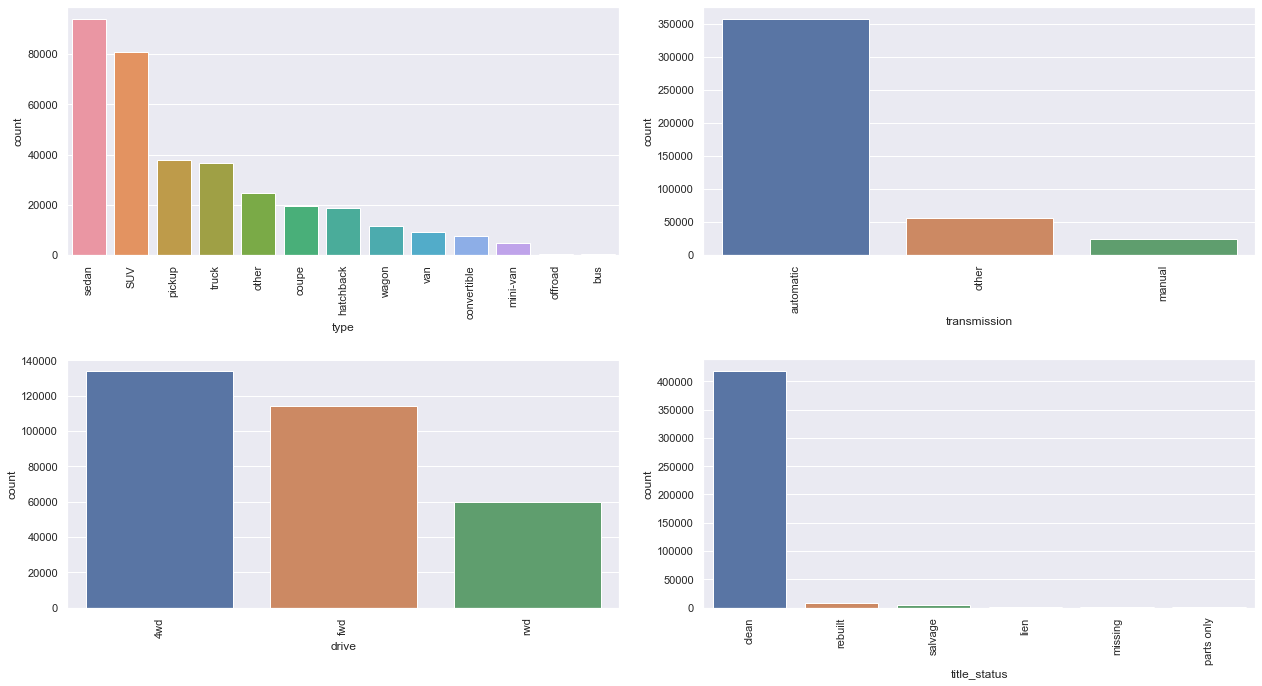

In [109]:
cat_type2 = ['type', 'transmission','drive','title_status']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 10)) 

for i, var in enumerate(cat_type2):
    row = i//2
    pos = i % 2    
    plot = sns.countplot(x=var, data=data, order = data[var].value_counts().index, ax=axs[row][pos])
    var = plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
fig.tight_layout(pad=2.0)

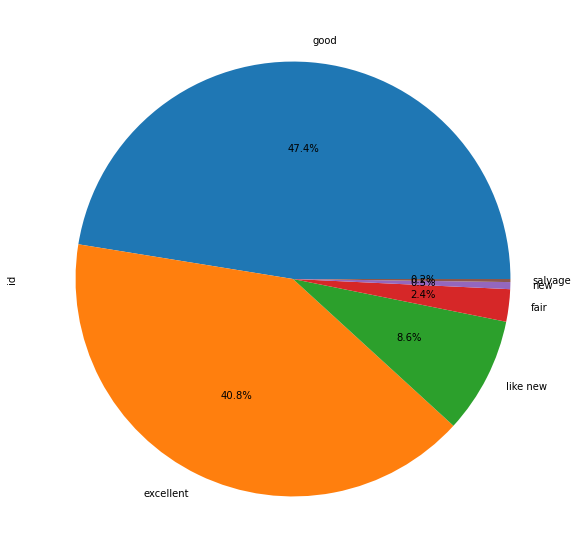

In [64]:
#Using matplotlib
types = data.groupby('condition').id.count().sort_values(ascending=False)
plt.figure(figsize=[10,10])
types.plot.pie(autopct="%.1f%%");

<AxesSubplot:title={'center':'Year Vs Price'}, xlabel='year', ylabel='Increase In price'>

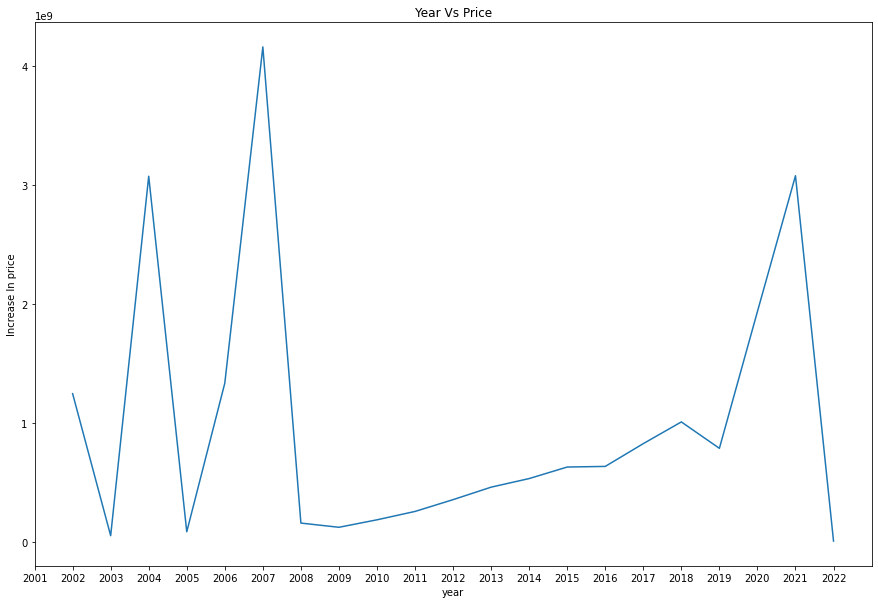

In [72]:
import numpy as np
var =  data[data['year']>2001].groupby('year').price.sum() 
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1,1,1)
plt.xticks(np.arange(2001, 2023))
ax1.set_xlabel('Condition Of Car')
ax1.set_ylabel('Increase In price')
ax1.set_title("Year Vs Price")
var.plot(kind='line')

In [91]:
manf7000 = ['ford', 'chevrolet', 'toyota', 'honda', 'jeep']
vehicles_ca_2020 = data.loc[(data['manufacturer'].isin(manf7000))&(data['state']=='ca')&((data['year']==2020)), :].copy()


<AxesSubplot:xlabel='state', ylabel='manufacturer'>

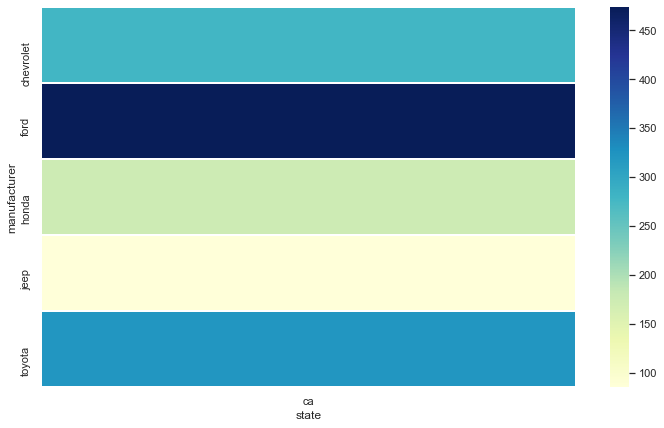

In [93]:
state_ser = vehicles_ca_2017.groupby('manufacturer').state.value_counts()
state_ser_df = pd.DataFrame(state_ser.unstack())

plt.subplots(figsize=(12, 7))
sns.heatmap(state_ser_df, cmap="YlGnBu", linecolor='white', linewidth=1)

<AxesSubplot:xlabel='manufacturer', ylabel='year'>

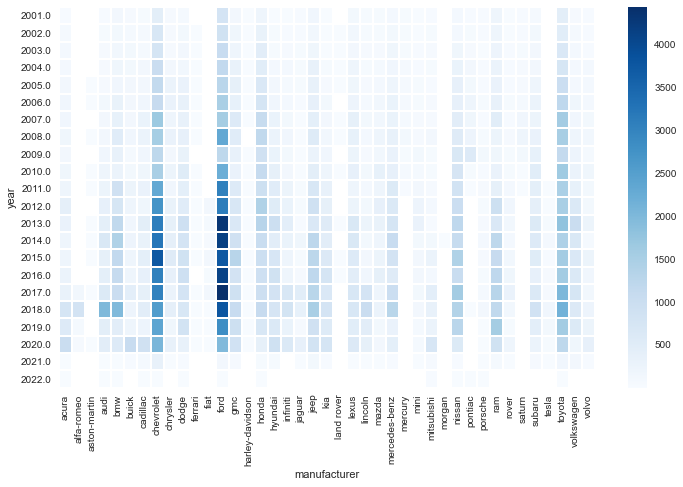

In [44]:
manf_ser = data[data['year']>2000].groupby('year').manufacturer.value_counts()
manf_ser_df = pd.DataFrame(manf_ser.unstack())

plt.subplots(figsize=(12, 7))
sns.heatmap(manf_ser_df, cmap='Blues', linecolor='white', linewidth=1)

# Model

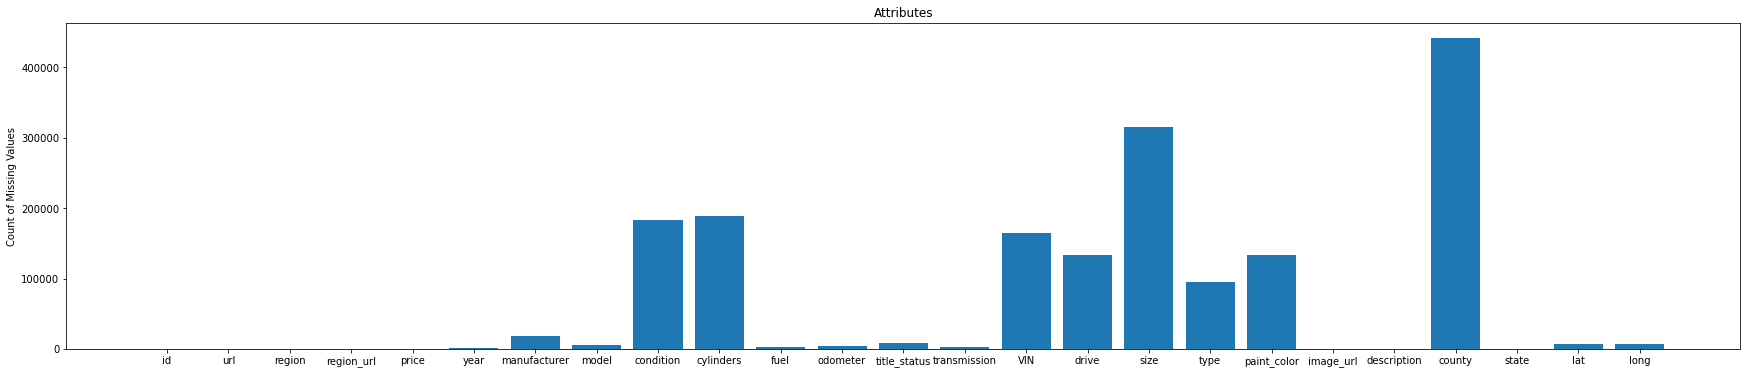

In [4]:
null = data.isnull().sum()
plt.figure(figsize=(30, 6))
plt.bar(null.index, null.values);
plt.ylabel('Count of Missing Values');
plt.title('Attributes');

In [5]:
# Drop unwanted columns
drop_attributes = ['id', 'url', 'region_url','model', 'VIN', 'image_url', 'description', 'county','size',
                   'paint_color']
data.drop(drop_attributes, axis=1, inplace=True)

In [6]:
data.head()

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state,lat,long
0,auburn,9500,2003.0,chrysler,excellent,6 cylinders,gas,30376.0,clean,automatic,fwd,mini-van,al,32.614209,-85.326357
1,auburn,28990,2018.0,gmc,good,6 cylinders,gas,20736.0,clean,other,fwd,other,al,32.590000,-85.480000
2,auburn,16590,2013.0,lincoln,good,NaN,gas,61087.0,clean,other,fwd,sedan,al,32.590000,-85.480000
3,auburn,28990,2017.0,gmc,good,6 cylinders,gas,18041.0,clean,other,fwd,other,al,32.590000,-85.480000
4,auburn,20590,2017.0,lincoln,good,NaN,gas,36436.0,clean,other,fwd,sedan,al,32.590000,-85.480000


# Handling outlier 

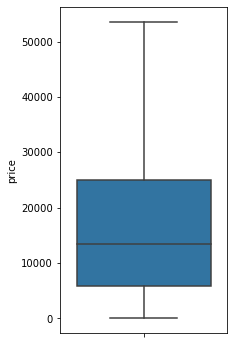

In [7]:
plt.figure(figsize=(3,6))
sns.boxplot(y='price', data=data,showfliers=False);

In [8]:
# Price of the vehicle can never be zero. So, we will remove rows with price as 0.
data = data[data['price']>0]

In [9]:
data.shape

(407307, 15)

In [10]:
y = data['price']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
removed_outliers
print(removed_outliers.value_counts())

True     366597
False     40710
Name: price, dtype: int64


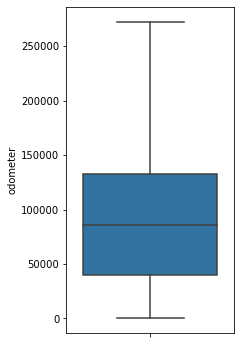

In [11]:
plt.figure(figsize=(3,6))
sns.boxplot(y='odometer', data=data,showfliers=False);

In [13]:
data.isnull().sum()

region               0
price                0
year              1022
manufacturer     16939
condition       160344
cylinders       170111
fuel              2422
odometer          2414
title_status      8389
transmission      1890
drive           122848
type             88251
state                0
lat               3950
long              3950
dtype: int64

In [14]:
# Drop duplicates
data.drop_duplicates(inplace=True)

In [15]:
data.shape

(356191, 15)

In [16]:
null_val = data.isnull().sum()
cols = []
for i in null_val.keys():
    if null_val[i]/ data.shape[0]< 0.60:
        cols.append(i)

data_cleaned = data[cols]

In [17]:
data_cleaned.isnull().sum()

region               0
price                0
year               868
manufacturer     15261
condition       131455
cylinders       146015
fuel              2026
odometer          1881
title_status      6974
transmission      1617
drive           106814
type             75160
state                0
lat               3751
long              3751
dtype: int64

In [18]:
enc = ['manufacturer', 'condition', 'cylinders','fuel','title_status', 'transmission', 'drive', 'type']

for i in range(len(enc)):
    val = enc[i]
    data_cleaned[val]=data_cleaned[val].fillna(data_cleaned[val].mode()[0])

In [19]:
impute = ['year','odometer', 'lat','long']

for i in range(len(impute)):
    val = impute[i]
    data_cleaned[val]=data_cleaned[val].fillna(data_cleaned[val].mean())

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_cleaned[['region','manufacturer', 'condition', 'cylinders',
             'fuel','title_status', 'transmission', 'drive', 'type','state']]= data_cleaned[
    ['region','manufacturer', 'condition', 'cylinders',
             'fuel','title_status', 'transmission', 'drive', 'type','state']].apply(le.fit_transform)

In [21]:
data_cleaned

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state,lat,long
0,16,9500,2003.0,8,0,5,2,30376.0,0,0,1,5,1,32.614209,-85.326357
1,16,28990,2018.0,14,2,5,2,20736.0,0,2,1,7,1,32.590000,-85.480000
2,16,16590,2013.0,24,2,5,2,61087.0,0,2,1,9,1,32.590000,-85.480000
3,16,28990,2017.0,14,2,5,2,18041.0,0,2,1,7,1,32.590000,-85.480000
4,16,20590,2017.0,24,2,5,2,36436.0,0,2,1,9,1,32.590000,-85.480000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441391,397,23590,2017.0,18,2,5,2,25738.0,0,0,0,4,50,33.786500,-84.445400
441392,397,16990,2017.0,5,2,5,2,36688.0,0,2,1,9,50,33.786500,-84.445400
441393,397,21590,2013.0,4,2,5,4,44366.0,0,0,2,9,50,33.786500,-84.445400
441394,397,26990,2016.0,4,2,5,4,43934.0,0,2,0,3,50,33.786500,-84.445400


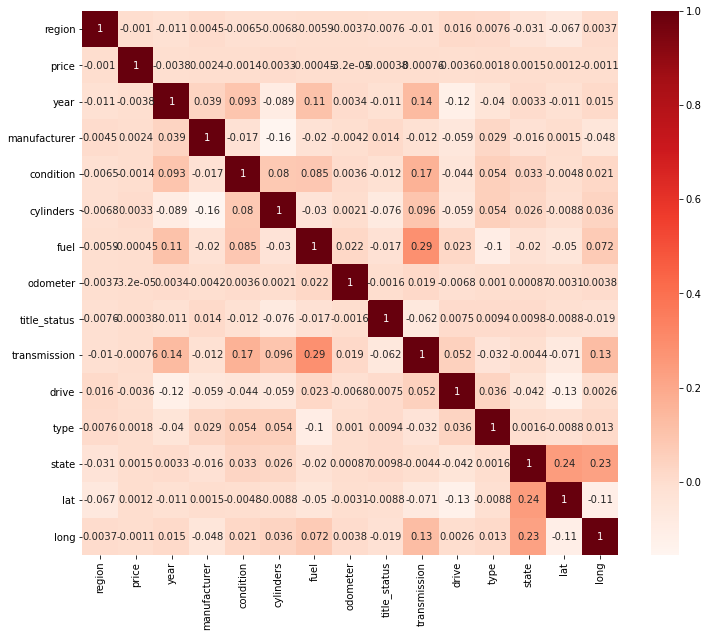

In [22]:
plt.figure(figsize=(12,10))
cor = data_cleaned.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [27]:
y = data_cleaned['price']
data_cleaned.drop('price', axis=1, inplace=True)

In [28]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X = std.fit_transform(data_cleaned)

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state= 0)

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [33]:

lr.fit(X_train, y_train)
y_lr = lr.predict(X_test)
print(r2_score(y_test,y_lr))

-0.00020313676915373335


In [34]:
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge()
ridge.fit(X_train, y_train)
y_ridge = ridge.predict(X_test)
print(r2_score(y_test,y_ridge))

-0.00020313514345393635


In [35]:
ls = Lasso()
ls.fit(X_train, y_train)
y_ls = ridge.predict(X_test)
print(r2_score(y_test,y_ls))

-0.00020313514345393635


In [34]:
from sklearn.ensemble import RandomForestRegressor

rfr =  RandomForestRegressor()
rfr.fit(X_train,y_train)
y_rfr = rfr.predict(X_test)

In [ ]:
r2_score(y_test,y_rfr)

In [38]:
#from xgboost import XGBoostRegressor
from xgboost import XGBRegressor
xgbr = XGBRegressor()

In [32]:
xgbr.fit(X_train,y_train)
y_xgbr = xgbr.predict(X_test)


NameError: name 'r2_score' is not defined

In [33]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_test,y_xgbr)

-1.4157070624737873

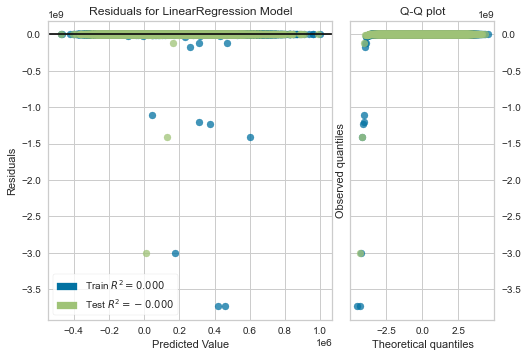

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [35]:
from yellowbrick.regressor import ResidualsPlot

visualizer1 = ResidualsPlot(LinearRegression(), hist=False, qqplot=True)
visualizer1.fit(X_train, y_train)
visualizer1.score(X_test, y_test)
visualizer1.show()

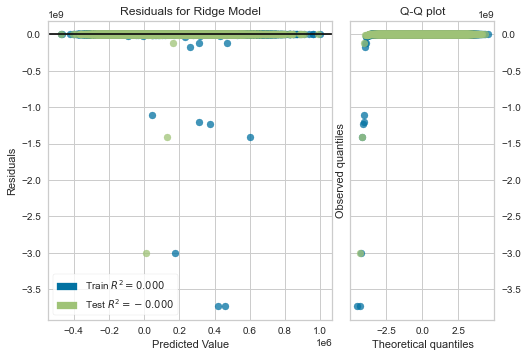

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [37]:
from sklearn.linear_model import Ridge, Lasso
visualizer1 = ResidualsPlot(Ridge(), hist=False, qqplot=True)
visualizer1.fit(X_train, y_train)
visualizer1.score(X_test, y_test)
visualizer1.show()

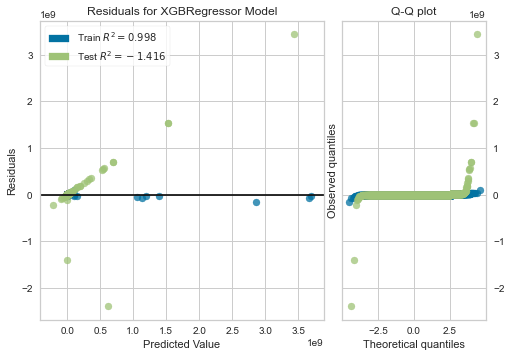

<AxesSubplot:title={'center':'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [39]:
visualizer1 = ResidualsPlot(XGBRegressor(), hist=False, qqplot=True)
visualizer1.fit(X_train, y_train)
visualizer1.score(X_test, y_test)
visualizer1.show()

In [40]:
lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso()

In [41]:
y_lasso = lasso.predict(X_test)
r2_score(y_test, y_lasso)

-0.00020312802118294115

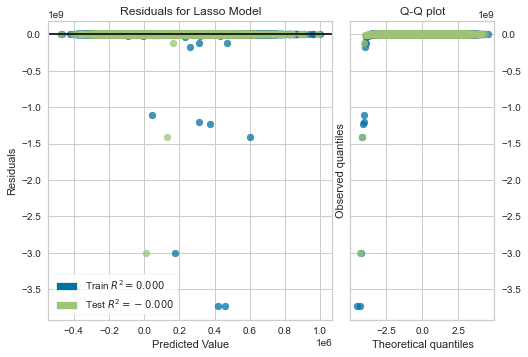

<AxesSubplot:title={'center':'Residuals for Lasso Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [43]:
visualizer1 = ResidualsPlot(Lasso(), hist=False, qqplot=True)
visualizer1.fit(X_train, y_train)
visualizer1.score(X_test, y_test)
visualizer1.show()